In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from analyze_src.basic_data_inspection import DataInspector, DataInfoInspectionStrategy, SummaryStatisticsInspectionStrategy, DistinctColumnsValues
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
%matplotlib inline

In [2]:
df = pd.read_excel(r'..\extracted_data\Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
# Data Info
data_inspector = DataInspector(DataInfoInspectionStrategy())
data_inspector.execute_strategy(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [5]:
# Statistics Summary
data_inspector = DataInspector(SummaryStatisticsInspectionStrategy())
data_inspector.execute_strategy(df)


Summary Statistics (Numerical Features)
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  

Summary Statistics (Categorical Features)
        InvoiceNo StockCode                         Description  \
count      

In [6]:
# Number of Distinct Columns Values
data_inspector = DataInspector(DistinctColumnsValues())
data_inspector.execute_strategy(df)


:Num of Distinct Columns Values
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64



Missing Values Count by Column:
Description      1454
CustomerID     135080
dtype: int64

Visualizing Missing Values...


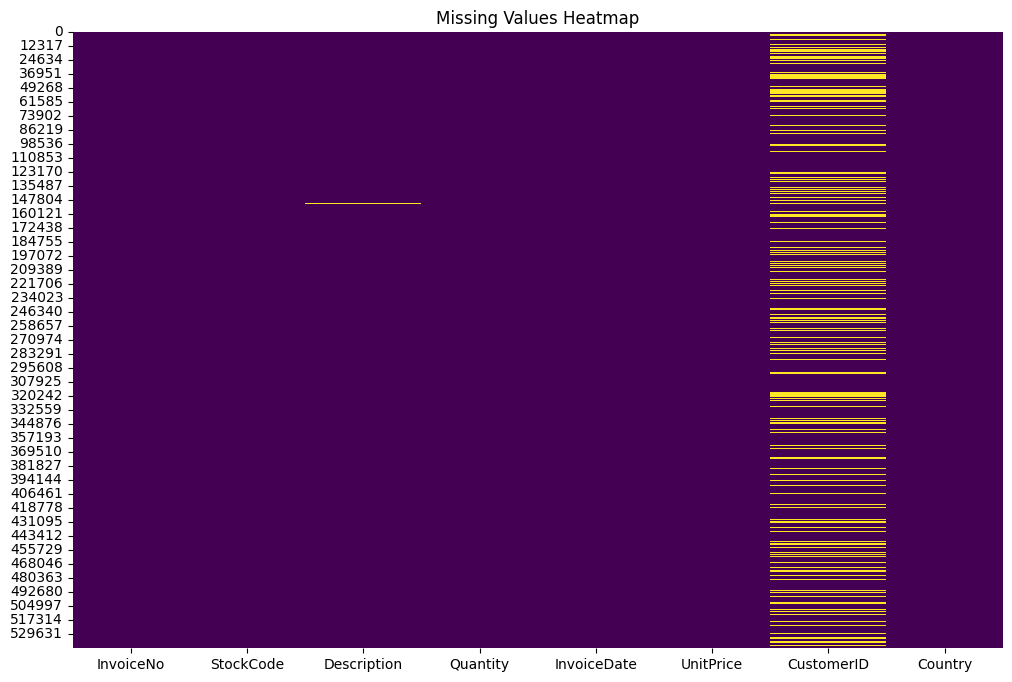

In [7]:
# Missing Values Detection
miss_analyzer = SimpleMissingValuesAnalysis()
miss_analyzer.identify_missing_values(df)
miss_analyzer.visualize_missing_values(df)

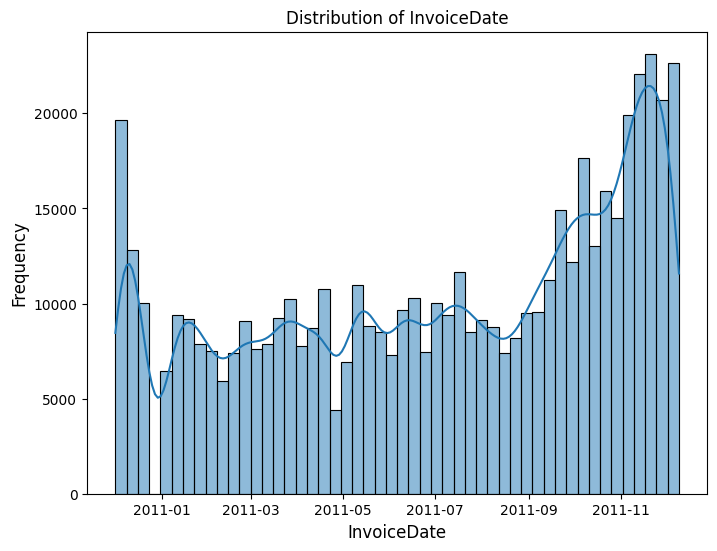

In [8]:
plt.figure(figsize=(8,6))
sns.histplot(df['InvoiceDate'], kde=True, bins=50)
plt.title(f'Distribution of InvoiceDate')
plt.xlabel('InvoiceDate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [9]:
customer = df.groupby(by='CustomerID').count().sort_values(by='InvoiceNo', ascending=False)
customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,
17841.0,7983,7983,7983,7983,7983,7983,7983
14911.0,5903,5903,5903,5903,5903,5903,5903
14096.0,5128,5128,5128,5128,5128,5128,5128
12748.0,4642,4642,4642,4642,4642,4642,4642
14606.0,2782,2782,2782,2782,2782,2782,2782
...,...,...,...,...,...,...,...
12943.0,1,1,1,1,1,1,1
18184.0,1,1,1,1,1,1,1
18174.0,1,1,1,1,1,1,1


In [10]:
best_customers = customer.head(20)
best_customers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,
17841.0,7983,7983,7983,7983,7983,7983,7983
14911.0,5903,5903,5903,5903,5903,5903,5903
14096.0,5128,5128,5128,5128,5128,5128,5128
12748.0,4642,4642,4642,4642,4642,4642,4642
14606.0,2782,2782,2782,2782,2782,2782,2782
15311.0,2491,2491,2491,2491,2491,2491,2491
14646.0,2085,2085,2085,2085,2085,2085,2085
13089.0,1857,1857,1857,1857,1857,1857,1857
13263.0,1677,1677,1677,1677,1677,1677,1677


In [11]:
best_customers.index = best_customers.index.astype('str')

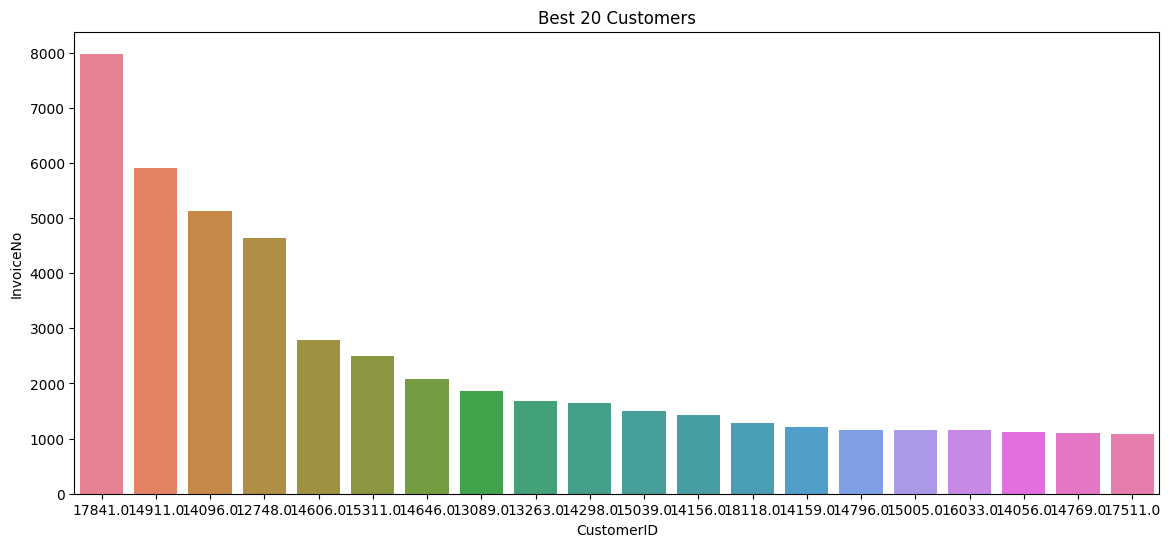

In [12]:
plt.figure(figsize=(14, 6))
sns.barplot(x=best_customers.index, y=best_customers.InvoiceNo, hue=best_customers.index)
plt.title('Best 20 Customers')
plt.show()

In [13]:
country = df.groupby('Country').count().sort_values(by='InvoiceNo', ascending=False)
country

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
Country,,,,,,,
United Kingdom,495478,495478,494024,495478,495478,495478,361878
Germany,9495,9495,9495,9495,9495,9495,9495
France,8557,8557,8557,8557,8557,8557,8491
EIRE,8196,8196,8196,8196,8196,8196,7485
Spain,2533,2533,2533,2533,2533,2533,2533
Netherlands,2371,2371,2371,2371,2371,2371,2371
Belgium,2069,2069,2069,2069,2069,2069,2069
Switzerland,2002,2002,2002,2002,2002,2002,1877
Portugal,1519,1519,1519,1519,1519,1519,1480


In [14]:
top_countries = country.head(10)

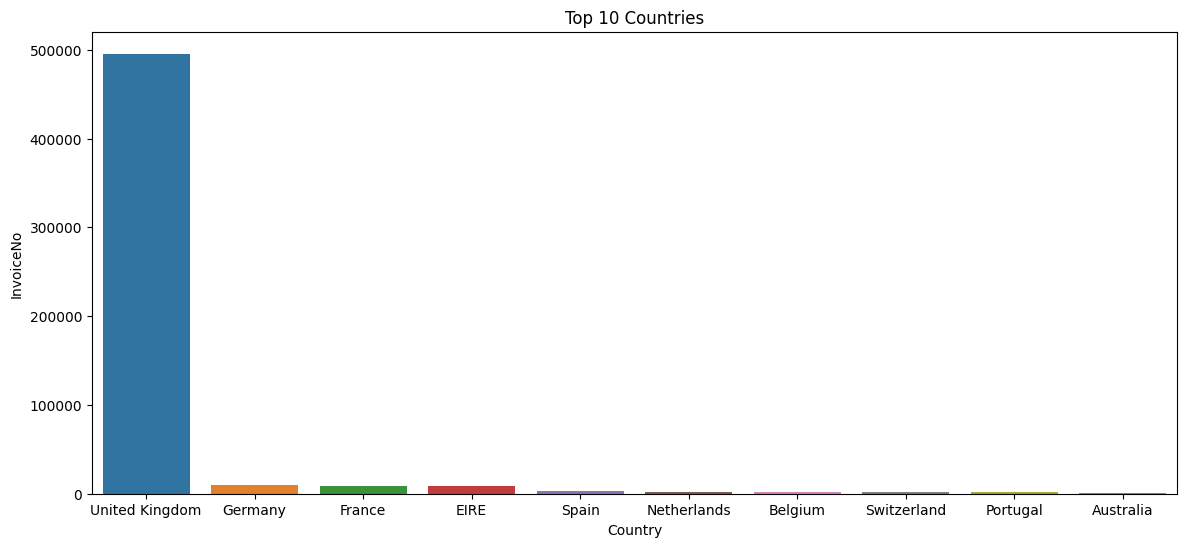

In [15]:
plt.figure(figsize=(14, 6))
sns.barplot(x=top_countries.index, y=top_countries.InvoiceNo, hue=top_countries.index)
plt.title('Top 10 Countries')
plt.show()

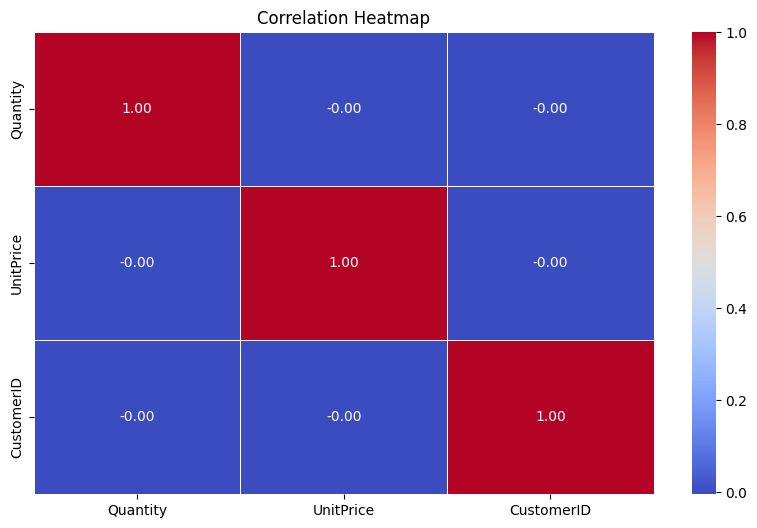

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()